In [14]:
import pandas as pd
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
ADDITIONAL_STOPWORDS = ['covfefe']
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Combined CSV only tweets cleaned.csv')
df.head()

,tweet
0,liable accident caused autonomous car occurs f...
1,autonomous vehicles orders magnitude safer pre...
2,solution allow autonomous vehicles put insuran...
3,added benefit testing autonomous vehicles virt...
4,fully autonomous vehicles nearly impossible ma...


In [38]:
new_stopwords = ["im", "u", "&", 'amp', 'us', 'may', 'thing', 'isnt', 'dont', "i'm", "i’m", "we've", 's', 't', 'c', 'also', 'self driving','autonomous car','autonomous cars','automated cars', 'self driving vehicle', 'autonomous vehicle', 'self driving car','selfdriving','connected autonomous vehicle','driverassist technology']
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(new_stopwords)

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
# REMOVING STOPWORDS

pos_tweets = df['tweet']

test = pd.DataFrame(pos_tweets)

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#df['tweet'] = test['tweet_without_stopwords']
print(df['tweet'])
df.to_csv("Combined CSV only tweets cleaned.csv", index = False, encoding='utf-8-sig')

0       liable accident caused autonomous car occurs f...
1       autonomous vehicles orders magnitude safer pre...
2       solution allow autonomous vehicles put insuran...
3       added benefit testing autonomous vehicles virt...
4       fully autonomous vehicles nearly impossible ma...
                              ...                        
4636    gibberish including pacifically assume specifi...
4637    think point hes trying make probably vulnerabi...
4638    vehicles cyber risks looks taking vulnerabilit...
4639    use cclinux good idea waymo vehicles reasons s...
4640    thoughtful insightful piece weride tell critic...
Name: tweet, Length: 4641, dtype: object


In [46]:
def basic_clean(text):
    """
A simple function to clean up the data. All the words that are not designated as a stop word is then lemmatized after
encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore')
        .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [47]:
words = basic_clean(''.join(str(df['tweet'].tolist())))
print(words)

['liable', 'accident', 'caused', 'autonomous', 'car', 'occurs', 'focus', 'main', 'question', 'last', 'paper', 'civil', 'liability', 'autonomous', 'vehicle', 'autonomous', 'vehicle', 'order', 'magnitude', 'safer', 'preventing', 'many', 'type', 'accident', 'human', 'driver', 'error', 'solution', 'allow', 'autonomous', 'vehicle', 'put', 'insurance', 'branded', 'plan', 'insurance', 'plan', 'cant', 'cover', 'financial', 'cost', 'accident', 'insured', 'vehicle', 'exclusive', 'autonomous', 'vehicle', 'branded', 'insurer', 'must', 'exist', 'added', 'benefit', 'testing', 'autonomous', 'vehicle', 'virtual', 'world', 'first', 'minimising', 'chance', 'real', 'accident', 'fully', 'autonomous', 'vehicle', 'nearly', 'impossible', 'make', 'totally', 'safe', 'due', 'human', 'factor', 'autonomous', 'car', 'road', 'interconnected', 'number', 'car', 'accident', 'could', 'drop', 'nearly', 'zero', 'need', 'remove', 'human', 'error', 'human', 'unpredictability', 'societal', 'benefit', 'achieving', 'truly', '

In [48]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

(autonomous, vehicle)         1439
(self, driving)                911
(driverless, car)              713
(driving, car)                 359
(full, self)                   129
(car, crash)                   103
(driverassist, technology)      96
(linked, hundred)               86
(technology, linked)            85
(human, driver)                 65
(fully, autonomous)             62
(crash, data)                   60
(driving, test)                 59
(car, accident)                 54
(elon, musk)                    54
(hundred, crash)                51
(data, show)                    45
(car, company)                  43
(connected, autonomous)         40
(hundred, car)                  38
dtype: int64

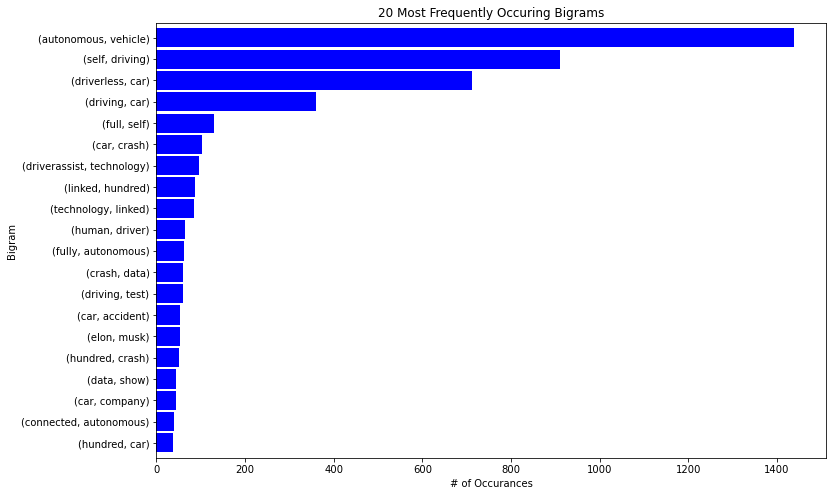

In [49]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.savefig("bigrams_series.png", bbox_inches='tight')

trigrams_series.sort_values().plot.barh(color=(72/255, 129/255, 179/255, 1), width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')
plt.savefig("trigrams_series.png", bbox_inches='tight')